In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_excel("CO2 dataset.xlsx")

In [3]:
data.columns = ["Year", 'CO2']
data['Year'] = pd.to_datetime(data['Year'], format='%Y')
data = data.set_index('Year')
data.head()

,CO2
Year,
1800-01-01,0.00568
1801-01-01,0.00561
1802-01-01,0.00555
1803-01-01,0.00548
1804-01-01,0.00542


In [4]:
upsampled_month = data.copy()
upsampled_month = upsampled_month.resample('M').mean()
print(upsampled_month.head(13))

                CO2
Year               
1800-01-31  0.00568
1800-02-28      NaN
1800-03-31      NaN
1800-04-30      NaN
1800-05-31      NaN
1800-06-30      NaN
1800-07-31      NaN
1800-08-31      NaN
1800-09-30      NaN
1800-10-31      NaN
1800-11-30      NaN
1800-12-31      NaN
1801-01-31  0.00561


                 CO2
Year                
1800-01-31  0.005680
1800-02-28  0.005674
1800-03-31  0.005668
1800-04-30  0.005662
1800-05-31  0.005657
1800-06-30  0.005651
1800-07-31  0.005645
1800-08-31  0.005639
1800-09-30  0.005633
1800-10-31  0.005628
1800-11-30  0.005622
1800-12-31  0.005616
1801-01-31  0.005610
1801-02-28  0.005605
1801-03-31  0.005600


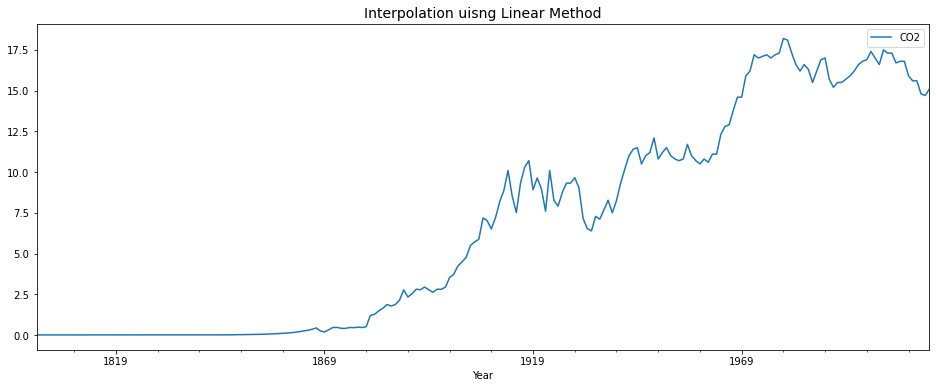

In [5]:
interpolated_month = upsampled_month.interpolate(method='linear') 
print(interpolated_month.head(15))
interpolated_month.plot(figsize=(16,6))
plt.title("Interpolation uisng Linear Method", fontsize =  14)
plt.show()

In [6]:
interpolated_month.to_csv("CO2_Monthly Dataset.csv")

In [7]:
train_len = 2520
train = interpolated_month[0:train_len]
test = interpolated_month[train_len:]

In [8]:
train

,CO2
Year,
1800-01-31,0.005680
1800-02-28,0.005674
1800-03-31,0.005668
1800-04-30,0.005662
1800-05-31,0.005657
...,...
2009-08-31,15.725000
2009-09-30,15.700000
2009-10-31,15.675000


In [9]:
test

,CO2
Year,
2010-01-31,15.600000
2010-02-28,15.600000
2010-03-31,15.600000
2010-04-30,15.600000
2010-05-31,15.600000
2010-06-30,15.600000
2010-07-31,15.600000
2010-08-31,15.600000
2010-09-30,15.600000


C:\Users\Zoheb Kazi\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


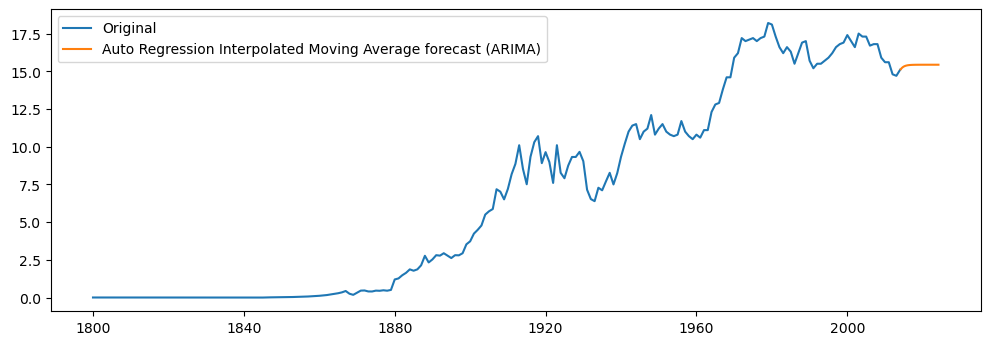

In [10]:
from statsmodels.tsa.arima.model import ARIMA
final_model = ARIMA(interpolated_month, order=(5, 1, 6))
final_model_fit = final_model.fit()
forecast = pd.DataFrame()
forecast['arima_forecast'] = final_model_fit.predict(start = 2569, end = 2689)

plt.figure(figsize=(12,4), dpi=100)
plt.plot(data['CO2'], label='Original')
plt.plot(forecast['arima_forecast'], label='Auto Regression Interpolated Moving Average forecast (ARIMA)')
plt.legend(loc='best')
plt.show()

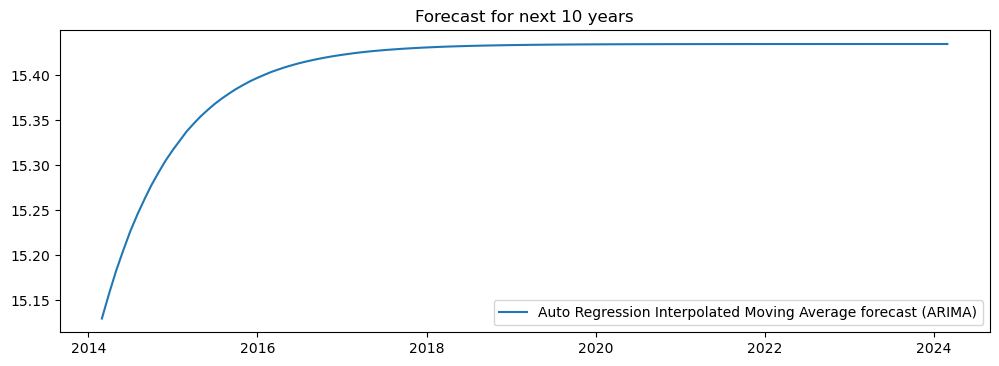

In [11]:
plt.figure(figsize=(12,4), dpi=100)
plt.plot(forecast['arima_forecast'], label='Auto Regression Interpolated Moving Average forecast (ARIMA)')
plt.title('Forecast for next 10 years')
plt.legend(loc='best')
plt.show()

In [12]:
forecast

,arima_forecast
2014-02-28,15.129412
2014-03-31,15.156980
2014-04-30,15.182043
2014-05-31,15.204887
2014-06-30,15.225882
...,...
2023-10-31,15.434499
2023-11-30,15.434500
2023-12-31,15.434500
2024-01-31,15.434500
